In [1]:
import matplotlib.pyplot as plt
from numpy import *
from numpy.linalg import *
from mpl_toolkits.mplot3d import Axes3D

# %matplotlib widget
%matplotlib inline

In [3]:
svec = loadtxt("../Data/3x3-0p/cell")
rvec = svec/3
b = 4*pi/(linalg.norm(rvec[0])*sqrt(3))
qvec = b*array([[-sqrt(3)/2,-1/2,0],[0,1,0],[sqrt(3)/2,-1/2,0]])/3
qdif = array([[qvec[0]-qvec[1],qvec[1]-qvec[2],qvec[2]-qvec[0]]])
qdif= qdif[0]
qunit = qvec/abs(linalg.norm(qvec[0]))


In [9]:
n_nb=loadtxt("../Data/3x3-0p/nb")
n_se=loadtxt("../Data/3x3-0p/se")
m_nb=loadtxt("../Data/3x3-0p-p2/nb")
m_se=loadtxt("../Data/3x3-0p-p2/se")

n_atom = dot(concatenate([n_nb,n_se]),svec)
n_atom = n_atom-n_atom[0]
m_atom = dot(concatenate([m_nb,m_se]),svec)
m_atom = m_atom-(m_atom[0]-n_atom[0])
m_atom = m_atom -average(m_atom[:9]-n_atom[:9],axis=0)

n_atom, m_atom = around(n_atom,3), around(m_atom,3)

nb = array([n_atom[:9],m_atom[:9]])
se_d = array([n_atom[9:18],m_atom[9:18]])
se_u = array([n_atom[18:],m_atom[18:]])
# nb_x, nb_y, nb_z = nb.T[0].T, nb.T[1].T, nb.T[2].T
# se_x, se_y, se_z = se.T[0].T, se.T[1].T, se.T[2].T
u = m_atom - n_atom

In [10]:
def plot_lattice():
    fig = plt.figure(figsize=(10,10))
    s1, s2 = 200,300
    hw=0.2
    cell_color="black"
    cell_lw=4
    cell_zorder=0
    plt.scatter(0,0,c="blue",s=s2,label="Nb")
    plt.scatter(0,0,c="green",s=s1,label="Se")    
    period = arange(-2,3,1)
    for i in period:
        for j in period:
            plt.scatter(n_atom[:9].T[0]+(i*svec[0][0]+j*svec[1][0]),n_atom[:9].T[1]+(i*svec[0][1]+j*svec[1][1]),c="blue",s=s2,zorder=2)
            plt.scatter(n_atom[9:17].T[0]+(i*svec[0][0]+j*svec[1][0]),n_atom[9:17].T[1]+(i*svec[0][1]+j*svec[1][1]),c="green",s=s1,zorder=2)
            plt.plot([0,svec[0][0]],[0,svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[1][0]],[0,svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[0][0],svec[0][0]+svec[1][0]],[svec[0][1],svec[0][1]+svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],svec[1][0]+svec[0][0]],[svec[1][1],svec[1][1]+svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[0][0]],[0,svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[1][0]],[0,-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[0][0],svec[0][0]+svec[1][0]],[svec[0][1],svec[0][1]-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],svec[1][0]+svec[0][0]],[-svec[1][1],-svec[1][1]+svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],-svec[0][0]],[svec[1][1],-svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([-svec[0][0],svec[1][0]],[svec[0][1],-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            for k in [0,6,8]:
                plt.arrow(n_atom[k][0]+(i*svec[0][0]+j*svec[1][0]),n_atom[k][1]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="black",head_width=hw)   
            for k in [3,4,7]:
                plt.arrow(n_atom[k][0]+(i*svec[0][0]+j*svec[1][0]),n_atom[k][1]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="red",head_width=hw)   
            for k in [1,2,5]:
                plt.arrow(n_atom[k][0]+(i*svec[0][0]+j*svec[1][0]),n_atom[k][1]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="orange",head_width=hw)   
    plt.xlim(-12,12)
    plt.ylim(-12,12)
    plt.xticks([])
    plt.yticks([])
#     plt.axis("equal")
    plt.legend(loc='upper right', borderpad=1,markerscale=1,labelspacing=1,fontsize=12)
#     plt.savefig("3x3_lattice_c3.pdf",bbox_inches='tight')
    # plt.axis("equal")
#     plt.show()

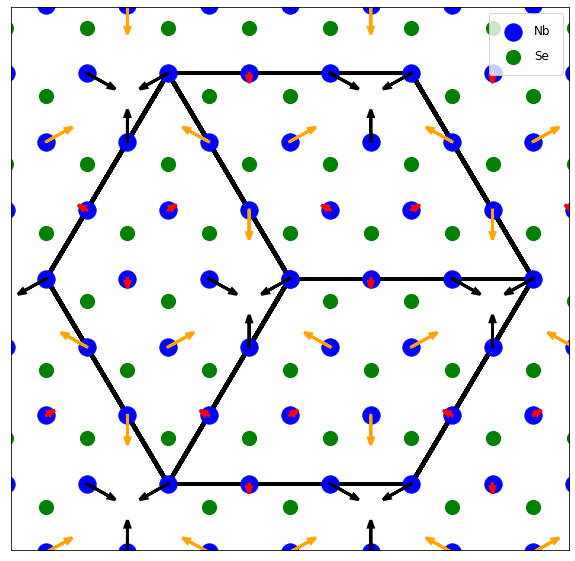

In [6]:
plot_lattice()

In [7]:
u

array([[-0.096, -0.055, -0.   ],
       [-0.086,  0.049, -0.   ],
       [ 0.   , -0.1  , -0.   ],
       [ 0.   , -0.013,  0.   ],
       [-0.012,  0.007,  0.   ],
       [ 0.086,  0.049, -0.   ],
       [ 0.096, -0.055, -0.   ],
       [ 0.011,  0.007, -0.   ],
       [ 0.   ,  0.111, -0.   ],
       [ 0.   , -0.001, -0.136],
       [ 0.018, -0.018, -0.216],
       [-0.007,  0.024, -0.216],
       [ 0.024, -0.007, -0.216],
       [ 0.   ,  0.   , -0.21 ],
       [ 0.006,  0.024, -0.216],
       [-0.024, -0.007, -0.216],
       [-0.018, -0.018, -0.216],
       [ 0.   ,  0.   , -0.318],
       [ 0.   , -0.001,  0.136],
       [ 0.018, -0.018,  0.216],
       [-0.007,  0.024,  0.216],
       [ 0.024, -0.007,  0.216],
       [ 0.   ,  0.   ,  0.21 ],
       [ 0.006,  0.024,  0.216],
       [-0.024, -0.007,  0.216],
       [-0.018, -0.018,  0.216],
       [ 0.   ,  0.   ,  0.318]])

In [8]:
for i in u:
    print(norm(i))

0.11063905277974861
0.09897979591815739
0.09999999999999964
0.013
0.013892443989449872
0.09897979591815713
0.11063905277974868
0.013038404810405461
0.11100000000000065
0.13600367642089692
0.21749482752470228
0.21744194627532193
0.2174419462753219
0.2100000000000002
0.21741205118392123
0.21744194627532193
0.21749482752470226
0.31800000000000006
0.13600367642089692
0.21749482752470228
0.21744194627532193
0.2174419462753219
0.2100000000000002
0.21741205118392123
0.21744194627532193
0.21749482752470226
0.31800000000000006


In [104]:
u

array([[-9.61288715e-02, -5.52435659e-02, -1.20644547e-07],
       [-8.60799157e-02,  4.95138729e-02, -2.79121990e-08],
       [ 7.41190885e-05, -9.95550128e-02, -9.13836813e-08],
       [-2.66675595e-05, -1.29825909e-02,  5.00863864e-08],
       [-1.15095513e-02,  6.63984433e-03,  5.00764845e-07],
       [ 8.62568775e-02,  4.95308508e-02, -5.47632182e-09],
       [ 9.60861568e-02, -5.52861537e-02, -8.23699884e-09],
       [ 1.13884802e-02,  6.60355958e-03, -1.08773753e-07],
       [-6.06275375e-05,  1.10779196e-01, -1.88423730e-07],
       [ 1.15015348e-04, -1.79991603e-04, -1.36131858e-01],
       [ 1.78373384e-02, -1.74877428e-02, -2.16476484e-01],
       [-6.25776704e-03,  2.44764200e-02, -2.16454749e-01],
       [ 2.41170132e-02, -6.78586142e-03, -2.16472269e-01],
       [-8.09028268e-06,  6.84765919e-05, -2.10226651e-01],
       [ 6.28846878e-03,  2.44863594e-02, -2.16455219e-01],
       [-2.41027610e-02, -6.80477023e-03, -2.16453963e-01],
       [-1.78410737e-02, -1.74911753e-02

In [90]:
def uToQ(supercell,q,disp):
    return dot(exp(-1j*dot(supercell,q.T)).T,u)

In [91]:
utilde = uToQ(n_atom,qvec,u)

In [98]:
n_atom

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.48939715e+00,  6.04381680e+00,  0.00000000e+00],
       [-1.74469805e+00,  3.02191302e+00,  0.00000000e+00],
       [ 3.48940432e+00, -4.53250000e-07,  0.00000000e+00],
       [ 1.74470334e+00,  3.02191547e+00,  0.00000000e+00],
       [ 3.66380000e-06,  6.04381807e+00,  0.00000000e+00],
       [ 6.97880462e+00, -6.34550000e-07,  0.00000000e+00],
       [ 5.23410793e+00,  3.02191420e+00,  0.00000000e+00],
       [ 3.48940474e+00,  6.04381870e+00,  0.00000000e+00],
       [-1.74472998e+00,  5.03652696e+00, -1.66176817e+00],
       [-3.35499400e-05,  2.01462038e+00, -1.66176838e+00],
       [ 1.74466759e+00, -1.00729564e+00, -1.66177191e+00],
       [ 1.74467455e+00,  5.03653340e+00, -1.66177295e+00],
       [ 3.48937423e+00,  2.01462228e+00, -1.66177066e+00],
       [ 5.23407621e+00, -1.00729464e+00, -1.66177274e+00],
       [ 5.23406951e+00,  5.03653086e+00, -1.66177233e+00],
       [ 6.97877552e+00,  2.01461512e+00

In [92]:
for i in utilde:
    print(norm(i))

0.3919240937160101
0.3911577809868075
0.3921579385001484


In [93]:
linalg.norm(qvec[0])/linalg.norm(utilde[2])

1.7673579255365606

In [94]:
for i in real(utilde):
    print(norm(i))

0.37782809452131444
0.09593183363747455
0.09996918351743767


In [95]:
for i in imag(utilde):
    print(norm(i))

0.10416537920781822
0.379211672976288
0.3792018078484635


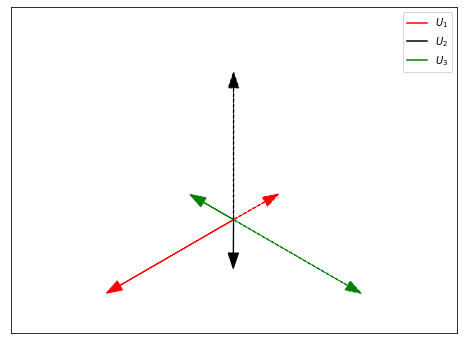

In [97]:
fig = plt.figure(figsize=(8,6))
# for i in qvec:
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="blue")
#     plt.scatter(i[0]*13/10,i[1]*13/10,s=0.0001)
    
colors=["red","black","green"]
    
for i in range(3):
    plt.arrow(0,0,real(utilde)[i][0],real(utilde)[i][1],head_width=0.03,color=colors[i],ls="-",lw=1)
    plt.arrow(0,0,imag(utilde)[i][0],imag(utilde)[i][1],head_width=0.03,color=colors[i],ls="--",lw=1)
    plt.scatter(real(utilde)[i][0]*15/10,real(utilde)[i][1]*15/10,s=0.0001)
    plt.scatter(imag(utilde)[i][0]*15/10,imag(utilde)[i][1]*15/10,s=0.0001)
    plt.plot(0,c=colors[i],label=r"$U_{}$".format(i+1))
    
# for i in real(utilde):
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="black")
#     plt.scatter(i[0]*15/10,i[1]*15/10,s=0.0001)
    
# for i in imag(utilde):
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="red")
#     plt.scatter(i[0]*15/10,i[1]*15/10,s=0.0001)


# plt.plot(0,c="black",label="Re(CDW)")
# plt.plot(0,c="red",label="Im(CDW)")
# plt.plot(0,c="blue",label="Q-vec")
plt.xticks([])
plt.yticks([])
plt.legend()
plt.axis("equal")    
plt.show()

In [ ]:
sum(se[1]-se[0],axis=0)